In [ ]:
from pandas import DataFrame
from numpy import max , array , exp 
from matplotlib.pyplot import savefig
from random import random , shuffle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
class Circle : 
  # setters
  def __cost_function ( self ) :
    cost = 0
    cur_sheet_size = self.__standard_size
    for i in self.__order :
      if i > cur_sheet_size : 
        cost += cur_sheet_size
        cur_sheet_size = self.__standard_size
      cur_sheet_size -= i
    cost += cur_sheet_size
    return cost

  # __init__
  def __init__( self , order , standard_size ) :
    self.__order = array(order)
    self.__standard_size = standard_size
    self.__cost = self.__number_of_stock
  
  # getters
  @property
  def cost ( self ) :
    return self.__cost
  @property
  def __number_of_stock ( self ) :
    nstock = 1
    cur_sheet_size = self.__standard_size
    for i in self.__order :
      if i > cur_sheet_size : 
        nstock += 1
        cur_sheet_size = self.__standard_size
      cur_sheet_size -= i
    return nstock

  # magic methods
  def __str__ ( self ) :
    return str( self.__order )
    
  def equal ( self , other ) :
    return self.__order.shape == other.__order.shape and (self.__order == other.__order).all() 

  # operator overloading  
  def __lt__ ( self , other ) :
    return self.cost > other.cost
  def __eq__ ( self , other ) :
    return self.cost == other.cost
  def __le__ ( self , other ) :
    return self.cost >= other.cost
  def __ge__ ( self , other ) :
    return self.cost <= other.cost
  def __gt__ ( self , other ) :
    return self.cost < other.cost
  
  # methods
  def copy ( self ) :
    return Cut( self.__order.copy() , self.__standard_size )

  def to_csv ( self , file_name ) : 
    DataFrame( self.__order ).to_csv( file_name )

  def neighbours ( self ) :
    result = []
    order = list(self.__order)
    for i in range(len(self.__order)) :
      for j in range( len ( self.__order ) ) :
        if i < j :
          result.append( Cut( order[:i] + order[ i + 1 : j ] + [order[i]]  + order[j:] , self.__standard_size ) )
        elif i > j :
          result.append( Cut( order[:j] + [ order[i] ] + order[ j : i ] + order[ i + 1 : ] , self.__standard_size ) )
    return result

In [ ]:
# simulated annealing algorithm
def simulated_annealing ( initial_solutions , cooling_rate_step , temp_length_step ) :
  cooling_rate = initial_cooling_rate
  temp = initial_temp
  runing = True
  cur_solutions = initial_solutions
  best = max( initial_solutions )
  costs = [ best.cost ]
  print( "initial best cost is" , best.cost)
  n = 0
  while runing :
    new_solutions = []
    for solution in cur_solutions :
      better_neighbour , neighbours = False , solution.neighbours()
      for neighbour in neighbours :
        if neighbour > solution :
          solution , better_neighbour = neighbour , True
          break
        elif (not better_neighbour) and random() < 0.5 :
          solution = neighbour
      new_solutions.append( solution )
    cur_solutions  = array(new_solutions)
    new_best = max( cur_solutions )
    costs.append( new_best.cost )
    if new_best > best :
      best , n = new_best , 0
      if best.cost <= upper_bound :
        return DataFrame(costs), best        
    print( "best cost is" , best.cost)
    print( "temp is" , temp)

In [ ]:
def create_initial_solutions ( requests , standard_size ,n = None ) :
  if n is None :
    n = len(requests)
  solutions = [ requests.copy() for _ in range(n)]
  for i in solutions :
    shuffle(i)
  return array([Cut( i , standard_size ) for i in solutions ])

initial best cost is 59
best cost is 59
temp is 1400
best cost is 58
temp is 1400
best cost is 58
temp is 1400
best cost is 58
temp is 1400
best cost is 58
temp is 1400
best cost is 58
temp is 1400
best cost is 58
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 54
temp is 1400
best cost is 54
temp is 1400
best cost is 54
temp is 1400
best cost is 54
tem

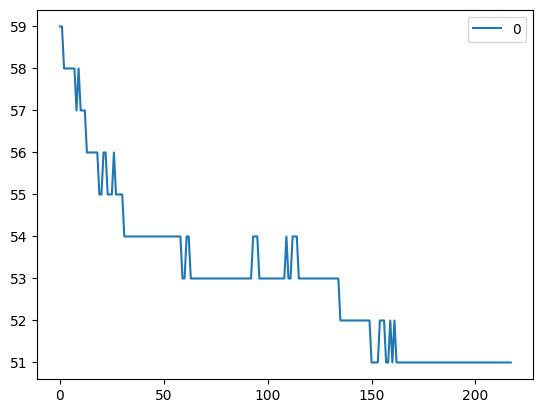

In [ ]:
requests = array(list(map(int ,open("drive/MyDrive/bio computing/HW4/input1.csv").read().split(","))))
stockLength = 1000
solutions , best = simulated_annealing( initial_temp = len(requests) * 10 , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 20 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print(best)
print("number_of_stock=", best.cost)
best.to_csv( "drive/MyDrive/bio computing/HW4/1.csv" )
solutions.plot()
savefig("drive/MyDrive/bio computing/HW4/1.png" , dpi = 300 )

In [ ]:
requests = array(list(map(int ,open("drive/MyDrive/bio computing/HW4/input2.csv").read().split(","))))
stockLength = 5600
solutions , best = simulated_annealing( initial_temp = len(requests) * 10 , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 20 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print(best)
print("number_of_stock=", best.cost)
best.to_csv( "drive/MyDrive/bio computing/HW4/2.csv" )
solutions.plot()
savefig("drive/MyDrive/bio computing/HW4/2.png" , dpi = 300 )

initial best cost is 88
best cost is 87
temp is 2190
best cost is 87
temp is 2190
best cost is 87
temp is 2190
best cost is 87
temp is 2190
best cost is 86
temp is 2190
best cost is 86
temp is 2190
best cost is 86
temp is 2190
best cost is 85
temp is 2190
best cost is 85
temp is 2190
best cost is 85
temp is 2190
best cost is 84
temp is 2190
best cost is 84
temp is 2190
best cost is 84
temp is 2190
best cost is 84
temp is 2190
best cost is 83
temp is 2190
best cost is 83
temp is 2190
best cost is 83
temp is 2190
best cost is 83
temp is 2190
best cost is 83
temp is 2190
best cost is 83
temp is 2190
best cost is 83
temp is 2190
best cost is 83
temp is 2190
best cost is 83
temp is 2190
best cost is 83
temp is 2190
best cost is 82
temp is 2190
best cost is 82
temp is 2190
best cost is 82
temp is 2190
best cost is 82
temp is 2190
best cost is 82
temp is 2190
best cost is 82
temp is 2190
best cost is 82
temp is 2190
best cost is 82
temp is 2190
best cost is 82
temp is 2190
best cost is 82
tem

In [ ]:
requests = array(list(map(int ,open("drive/MyDrive/bio computing/HW4/input3.csv").read().split(","))))
stockLength = 500
solutions , best = simulated_annealing( initial_temp = len(requests) , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 70 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print(best)
print("number_of_stock=", best.cost)
best.to_csv( "drive/MyDrive/bio computing/HW4/2.csv" )
solutions.plot()
savefig("drive/MyDrive/bio computing/HW4/3.png" , dpi = 300 )

In [ ]:
requests = array(list(map(int ,open("drive/MyDrive/bio computing/HW4/input4.csv").read().split(","))))
stockLength = 100
solutions , best = simulated_annealing( initial_temp = len(requests) , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 70 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print(best)
print("number_of_stock=", best.cost)
best.to_csv( "drive/MyDrive/bio computing/HW4/2.csv" )
solutions.plot()
savefig("drive/MyDrive/bio computing/HW4/4.png" , dpi = 300)